##Preparing Tools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

from scipy.sparse import csr_matrix,hstack

import re
import string

In [ ]:
!pip install openpyxl
!pip install matplotlib seaborn

##Load Data

In [ ]:
#Import Train Dataset
synthetic_train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/synthetic_train_english.xlsx',index_col=False)
synthetic_train

,sentence,sentiment,topic
0,The lack of meat products leads to the failure...,negative,facility
1,The university's musical and artistic faciliti...,neutral,facility
2,Teaching methods are suitable for different ty...,neutral,curriculum
3,The program helped me become an expert in my f...,positive,curriculum
4,I think the training program can add more subj...,neutral,curriculum
...,...,...,...
8139,The security system in the school is very good...,neutral,facility
8140,The teacher helped me understand this subject ...,neutral,others
8141,You have become a companion and an important p...,positive,others
8142,The curriculum is tailored to the needs of the...,neutral,curriculum


In [ ]:
#Import Test Dataset
synthetic_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/synthetic_val_english.xlsx',index_col=False)
synthetic_test

,sentence,sentiment,topic
0,Poor material quality.,negative,facility
1,"The learning software is difficult to use, ma...",negative,facility
2,My school lacks basic amenities such as photo...,negative,facility
3,Need to create more activities to connect stu...,neutral,curriculum
4,They are very tolerant and understanding in t...,neutral,others
...,...,...,...
2031,The teacher provided very good and effective ...,neutral,curriculum
2032,The university's computer facilities are up-t...,neutral,facility
2033,Lack of flexibility in teaching methods and a...,negative,curriculum
2034,He is very sharp and has very good analytical...,positive,others


##Cleaning the Data

In [ ]:
synthetic_train.columns

Index(['sentence', 'sentiment', 'topic'], dtype='object')

In [ ]:
synthetic_test.columns

Index(['sentence', ' sentiment', ' topic'], dtype='object')

In [ ]:
synthetic_test.columns = synthetic_test.columns.str.replace(' ', '')

In [ ]:
synthetic_test.columns

Index(['sentence', 'sentiment', 'topic'], dtype='object')

In [ ]:
synthetic_train['sentiment'].value_counts()

,count
sentiment,
neutral,2724
negative,2711
positive,2709


In [ ]:
synthetic_test['sentiment'].value_counts()

,count
sentiment,
negative,686
positive,680
neutral,670


In [ ]:
synthetic_train['topic'].value_counts()

,count
topic,
others,2059
curriculum,2040
lecturer,2026
facility,2019


In [ ]:
synthetic_train

,sentence,sentiment,topic
0,The lack of meat products leads to the failure...,negative,facility
1,The university's musical and artistic faciliti...,neutral,facility
2,Teaching methods are suitable for different ty...,neutral,curriculum
3,The program helped me become an expert in my f...,positive,curriculum
4,I think the training program can add more subj...,neutral,curriculum
...,...,...,...
8139,The security system in the school is very good...,neutral,facility
8140,The teacher helped me understand this subject ...,neutral,others
8141,You have become a companion and an important p...,positive,others
8142,The curriculum is tailored to the needs of the...,neutral,curriculum


In [ ]:
synthetic_test

,sentence,sentiment,topic
0,Poor material quality.,negative,facility
1,"The learning software is difficult to use, ma...",negative,facility
2,My school lacks basic amenities such as photo...,negative,facility
3,Need to create more activities to connect stu...,neutral,curriculum
4,They are very tolerant and understanding in t...,neutral,others
...,...,...,...
2031,The teacher provided very good and effective ...,neutral,curriculum
2032,The university's computer facilities are up-t...,neutral,facility
2033,Lack of flexibility in teaching methods and a...,negative,curriculum
2034,He is very sharp and has very good analytical...,positive,others


In [ ]:
#Function to clean data

# def clean_text(text):
#     # Remove characters that are not English letters, numbers, or common punctuation
#     text = re.sub(r'[^\x00-\x7F]', '', text)  # Remove non-ASCII characters
#     text = re.sub(r'[^\w\s,.!?]', '', text)   # Remove special symbols
#     return text.lower()


# def clean_text(text):
#     # Remove non-ASCII characters
#     text = re.sub(r'[^\x00-\x7F]', '', text)
#     # Remove special symbols
#     text = re.sub(r'[^\w\s,.!?]', '', text)
#     # Remove links (URLs)
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
#     # Remove numbers
#     text = re.sub(r'\d+', '', text)
#     # Remove leading and trailing whitespace
#     text = text.strip()
#     return text.lower()

def clean_text(text):
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]', '', text)
    # Remove special symbols except for specific punctuation
    text = re.sub(r'[^\w\s,.!?]', '', text)
    # Remove links (URLs)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove leading and trailing whitespace
    text = text.strip()
    return text.lower()

In [ ]:
# Apply the function to the column
synthetic_train['sentence'] = synthetic_train['sentence'].apply(clean_text)
synthetic_test['sentence'] = synthetic_test['sentence'].apply(clean_text)

In [ ]:
synthetic_train

,sentence,sentiment,topic
0,the lack of meat products leads to the failure...,negative,facility
1,the universitys musical and artistic facilitie...,neutral,facility
2,teaching methods are suitable for different ty...,neutral,curriculum
3,the program helped me become an expert in my f...,positive,curriculum
4,i think the training program can add more subj...,neutral,curriculum
...,...,...,...
8139,the security system in the school is very good...,neutral,facility
8140,the teacher helped me understand this subject ...,neutral,others
8141,you have become a companion and an important p...,positive,others
8142,the curriculum is tailored to the needs of the...,neutral,curriculum


In [ ]:
synthetic_test

,sentence,sentiment,topic
0,poor material quality.,negative,facility
1,"the learning software is difficult to use, mak...",negative,facility
2,my school lacks basic amenities such as photoc...,negative,facility
3,need to create more activities to connect stud...,neutral,curriculum
4,they are very tolerant and understanding in th...,neutral,others
...,...,...,...
2031,the teacher provided very good and effective t...,neutral,curriculum
2032,the universitys computer facilities are uptoda...,neutral,facility
2033,lack of flexibility in teaching methods and as...,negative,curriculum
2034,he is very sharp and has very good analytical ...,positive,others


##Data Exploration

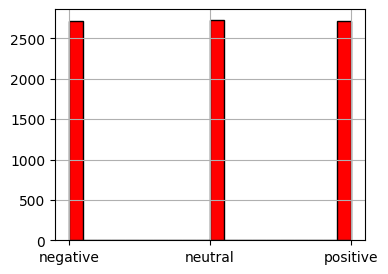

In [ ]:
synthetic_train['sentiment'].hist(bins=20, figsize=(4,3), color='r', edgecolor='black')
plt.show()

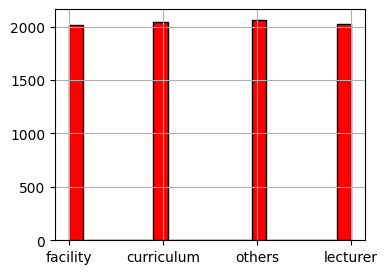

In [ ]:
synthetic_train['topic'].hist(bins=20, figsize=(4,3), color='r', edgecolor='black')
plt.show()

In [ ]:
# Get the length of the messages
length_of_sentence = synthetic_train['sentence'].str.len()
length_of_sentence.describe()

,sentence
count,8144.000000
mean,68.109283
std,22.617903
min,7.000000
25%,52.000000
50%,65.000000
75%,81.000000
max,217.000000


In [ ]:
length_of_sentence.value_counts()

,count
sentence,
64,184
67,172
53,168
61,166
63,158
...,...
184,1
12,1
157,1


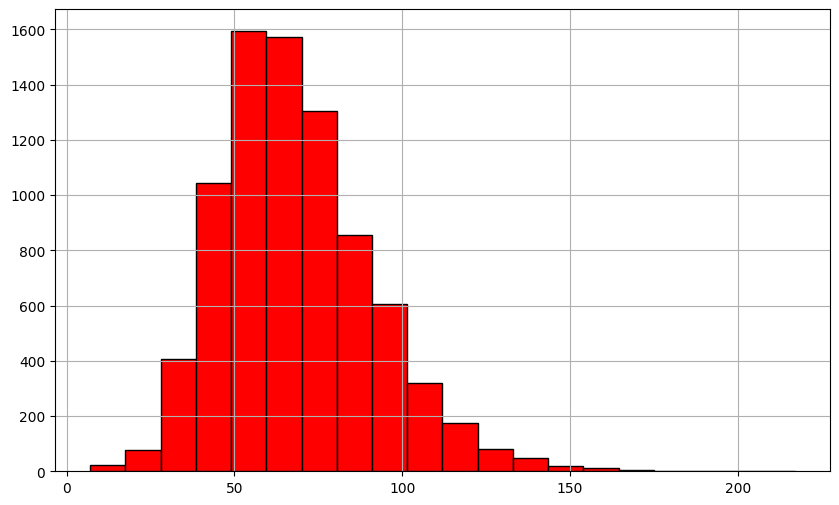

In [ ]:
#plot the histogram of the length column
length_of_sentence.hist(bins=20, figsize=(10,6), color='r', edgecolor='black')
plt.show()

##Plot the Wordcloud

In [ ]:
positive_train=synthetic_train[synthetic_train['sentiment']=='positive']
negative_train=synthetic_train[synthetic_train['sentiment']=='negative']
neutral_train=synthetic_train[synthetic_train['sentiment']=='neutral']

In [ ]:
positive_train

,sentence,sentiment,topic
3,the program helped me become an expert in my f...,positive,curriculum
8,you are a person who always respects other peo...,positive,others
9,this teacher is a great teacher.,positive,lecturer
10,always set clear goals for students so they kn...,positive,lecturer
11,the architectural and construction methods are...,positive,facility
...,...,...,...
8129,"convenient student areas, easy access to bus s...",positive,facility
8133,i hope to continue to learn and develop here i...,positive,curriculum
8134,the classrooms are equipped with many lights t...,positive,facility
8137,students are always encouraged to participate ...,positive,curriculum


In [ ]:
negative_train

,sentence,sentiment,topic
0,the lack of meat products leads to the failure...,negative,facility
6,i dont like this teacher because he is not dis...,negative,lecturer
7,this teacher is so demanding of his students t...,negative,lecturer
17,my study room is very crowded.,negative,facility
26,lack of bus stop or bus route nearby.,negative,facility
...,...,...,...
8120,he always fought for power and never shared it...,negative,others
8130,this teacher does not give any useful advice i...,negative,lecturer
8132,he is often stubborn and only knows how to spe...,negative,others
8135,you often get caught up in individual issues a...,negative,others


In [ ]:
neutral_train

,sentence,sentiment,topic
1,the universitys musical and artistic facilitie...,neutral,facility
2,teaching methods are suitable for different ty...,neutral,curriculum
4,i think the training program can add more subj...,neutral,curriculum
5,he is always openminded at work.,neutral,others
18,the schools curriculum is diverse and covers m...,neutral,curriculum
...,...,...,...
8136,see the time and effort it takes to create pro...,neutral,lecturer
8138,the teaching staff has a wealth of practical e...,neutral,curriculum
8139,the security system in the school is very good...,neutral,facility
8140,the teacher helped me understand this subject ...,neutral,others


In [ ]:
# Installing wardCloud
# !pip install wordcloud

In [ ]:
def plot_wordcloud_for_sentiment(df):
    """
    Generates and displays a WordCloud for all sentences in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the text data.
    """
    # Convert the 'sentence' column to a list and then to a single string
    sentence_list = df['sentence'].tolist()
    sentence_as_one_string = " ".join(sentence_list)

    # Generate and display the WordCloud
    plt.figure(figsize=(18, 18))
    plt.imshow(WordCloud().generate(sentence_as_one_string))

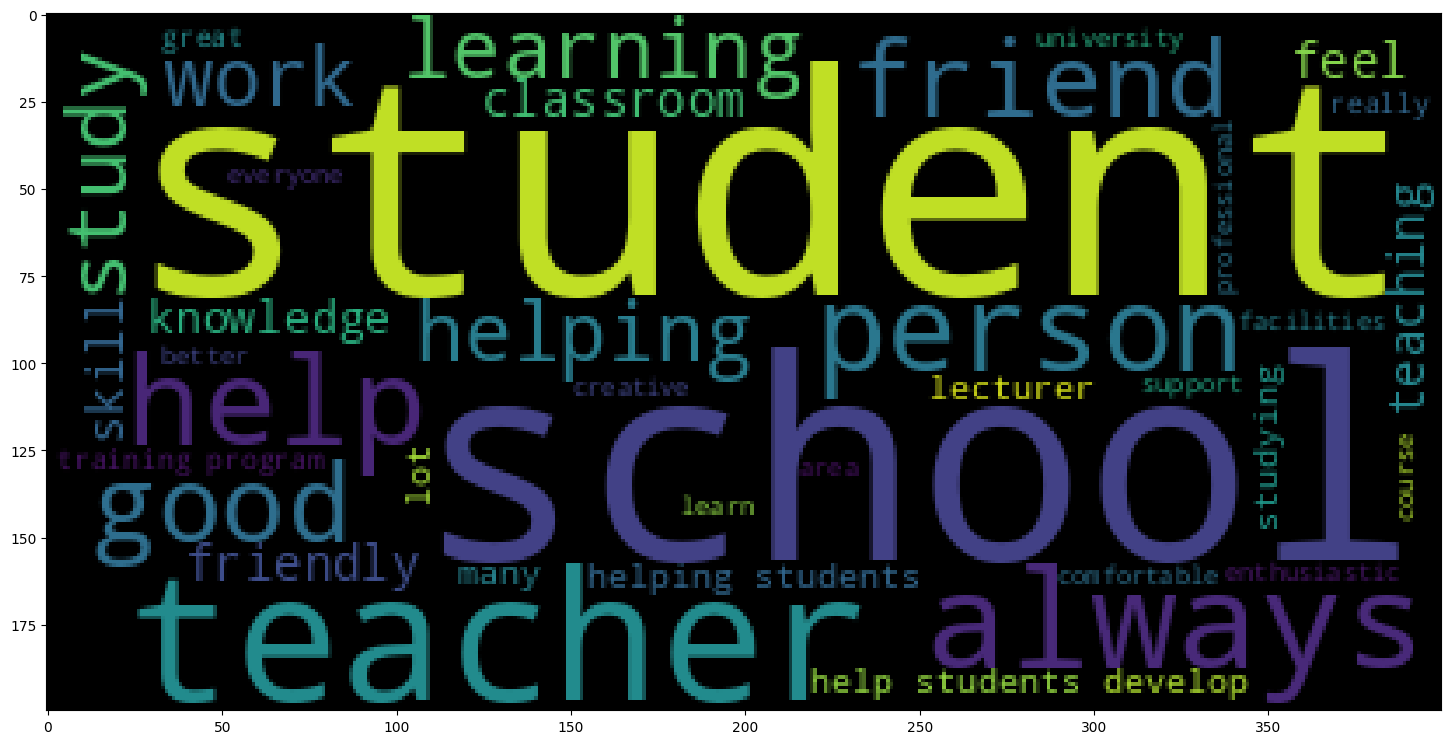

In [ ]:
#Ploting Positive words
plot_wordcloud_for_sentiment(positive_train)

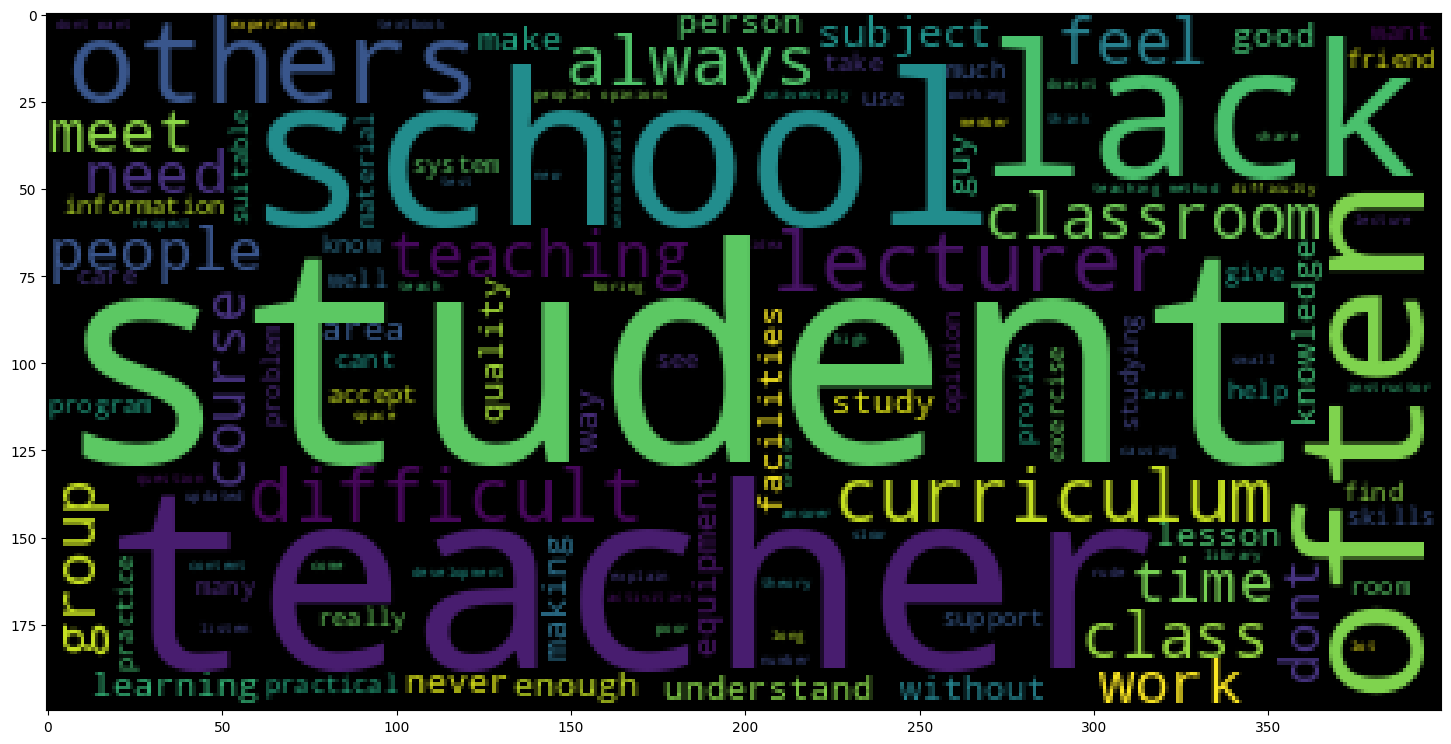

In [ ]:
#Negative words
plot_wordcloud_for_sentiment(negative_train)

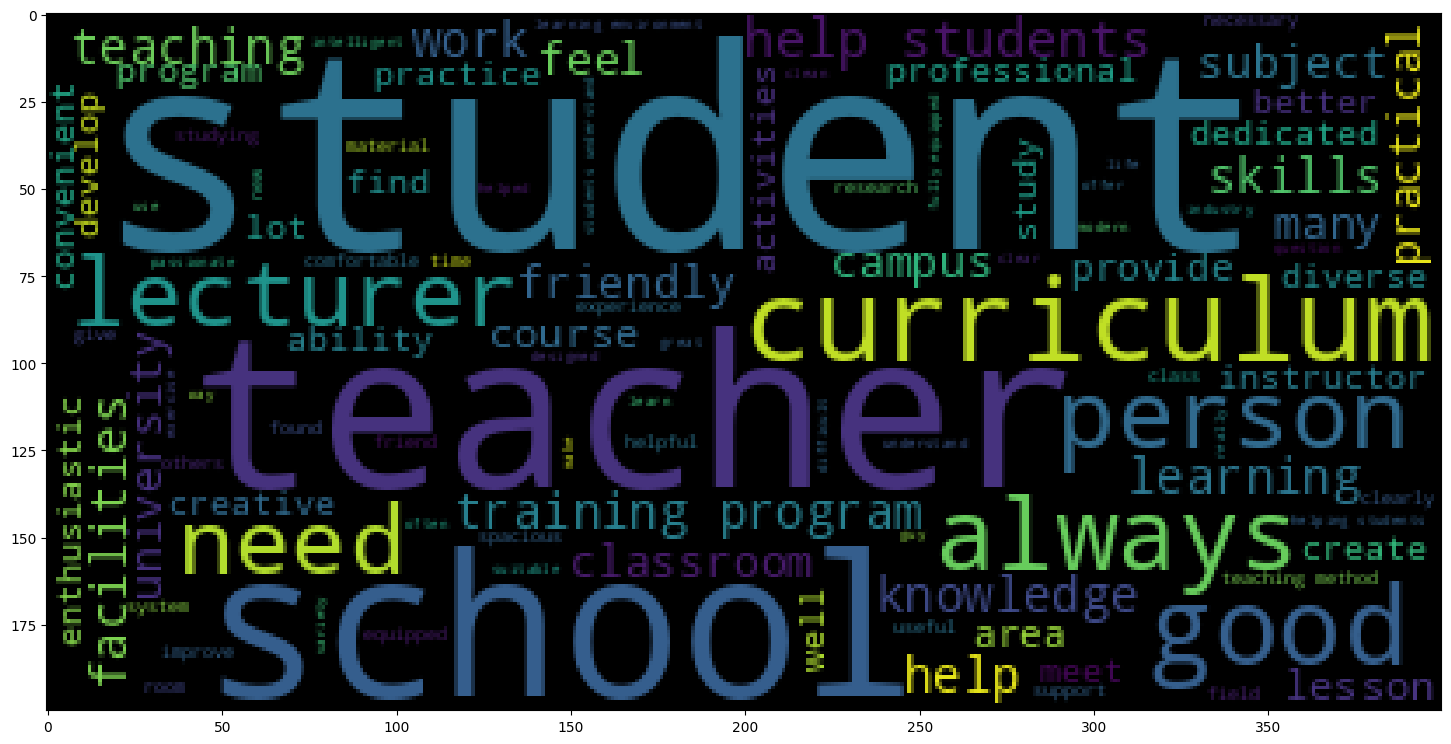

In [ ]:
#Neutral words
plot_wordcloud_for_sentiment(neutral_train)

##Performing data cleaning and remove punctuation from test

In [ ]:
# Installing contractions
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.0 MB/s eta 0:00:00


Labeling the Positive , Negative and Neutral to -1, 0, 1

In [ ]:
synthetic_train['sentiment'] = synthetic_train['sentiment'].str.strip()
synthetic_test['sentiment'] = synthetic_test['sentiment'].str.strip()

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column in the training DataFrame
synthetic_train['sentiment_label'] = label_encoder.fit_transform(synthetic_train['sentiment'])

# Transform the 'sentiment' column in the test DataFrame
synthetic_test['sentiment_label'] = label_encoder.transform(synthetic_test['sentiment'])

# # ##########################
# # # Define custom encoding
# encoding = {'negative': -1, 'neutral': 0, 'positive': 1}

# # Apply the custom encoding
# synthetic_train['sentiment_label'] = synthetic_train['sentiment'].map(encoding)
# synthetic_test['sentiment_label'] = synthetic_test['sentiment'].map(encoding)

In [ ]:
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def message_cleaning(message):
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Expand contractions
    message = contractions.fix(message)

    # Remove punctuation
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)

    # Tokenize the message
    tokens = word_tokenize(punc_removed_join)

    # Remove stop words and apply lemmatization
    stop_words = set(stopwords.words('english'))
    cleaned_message = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]

    return cleaned_message

##Saving Data Frames for Deep Learning Models

In [ ]:
def message_cleaning_deep(message):
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Expand contractions
    message = contractions.fix(message)

    # Remove punctuation
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)

    # Tokenize the message
    tokens = word_tokenize(punc_removed_join)

    # Remove stop words and apply lemmatization
    stop_words = set(stopwords.words('english'))
    cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]

    # Join the cleaned words back into a single string
    cleaned_message = ' '.join(cleaned_words)

    return cleaned_message

In [ ]:
synthetic_train_deep_learining = synthetic_train.copy()
synthetic_train_deep_learining['sentence'] = synthetic_train_deep_learining['sentence'].apply(message_cleaning_deep)

synthetic_test_deep_learining = synthetic_test.copy()
synthetic_test_deep_learining['sentence'] = synthetic_test_deep_learining['sentence'].apply(message_cleaning_deep)

In [ ]:
synthetic_train_deep_learining

,sentence,sentiment,topic,sentiment_label
0,lack meat product lead failure ensure quality ...,negative,facility,0
1,university musical artistic facility excellent,neutral,facility,1
2,teaching method suitable different type student,neutral,curriculum,1
3,program helped become expert field,positive,curriculum,2
4,think training program add subject history cul...,neutral,curriculum,1
...,...,...,...,...
8139,security system school good ensures safety stu...,neutral,facility,1
8140,teacher helped understand subject better,neutral,others,1
8141,become companion important part life,positive,others,2
8142,curriculum tailored need industry,neutral,curriculum,1


In [ ]:
synthetic_test_deep_learining

,sentence,sentiment,topic,sentiment_label
0,poor material quality,negative,facility,0
1,learning software difficult use making student...,negative,facility,0
2,school lack basic amenity photocopier printer ...,negative,facility,0
3,need create activity connect student lecturer,neutral,curriculum,1
4,tolerant understanding view,neutral,others,1
...,...,...,...,...
2031,teacher provided good effective teaching aid,neutral,curriculum,1
2032,university computer facility uptodate wellmain...,neutral,facility,1
2033,lack flexibility teaching method assessment le...,negative,curriculum,0
2034,sharp good analytical skill,positive,others,2


Saving data frames

In [ ]:
synthetic_test_deep_learining.to_csv('synthetic_test_deep_learining.csv', index=False)
synthetic_train_deep_learining.to_csv('synthetic_train_deep_learining.csv', index=False)

In [ ]:
# Cleaning the sentences in the tratin and test set
synthetic_train['sentence'] = synthetic_train['sentence'].apply(message_cleaning)
synthetic_test['sentence'] = synthetic_test['sentence'].apply(message_cleaning)

In [ ]:
synthetic_train.head()

,sentence,sentiment,topic,sentiment_label
0,"[lack, meat, product, lead, failure, ensure, q...",negative,facility,0
1,"[university, musical, artistic, facility, exce...",neutral,facility,1
2,"[teaching, method, suitable, different, type, ...",neutral,curriculum,1
3,"[program, helped, become, expert, field]",positive,curriculum,2
4,"[think, training, program, add, subject, histo...",neutral,curriculum,1


In [ ]:
synthetic_test.head()

,sentence,sentiment,topic,sentiment_label
0,"[poor, material, quality]",negative,facility,0
1,"[learning, software, difficult, use, making, s...",negative,facility,0
2,"[school, lack, basic, amenity, photocopier, pr...",negative,facility,0
3,"[need, create, activity, connect, student, lec...",neutral,curriculum,1
4,"[tolerant, understanding, view]",neutral,others,1


One Hot Encoding process

In [ ]:
# One-Hot Encoding
# synthetic_train = pd.get_dummies(synthetic_train, columns=['sentiment'], prefix='', prefix_sep='')
# synthetic_test = pd.get_dummies(synthetic_test, columns=['sentiment'], prefix='', prefix_sep='')

In [ ]:
# Divide topic using one hot encoding
synthetic_train = pd.get_dummies(synthetic_train, columns=['topic'], prefix='', prefix_sep='')
synthetic_test = pd.get_dummies(synthetic_test, columns=['topic'], prefix='', prefix_sep='')

In [ ]:
synthetic_train

,sentence,sentiment,sentiment_label,curriculum,facility,lecturer,others
0,"[lack, meat, product, lead, failure, ensure, q...",negative,0,False,True,False,False
1,"[university, musical, artistic, facility, exce...",neutral,1,False,True,False,False
2,"[teaching, method, suitable, different, type, ...",neutral,1,True,False,False,False
3,"[program, helped, become, expert, field]",positive,2,True,False,False,False
4,"[think, training, program, add, subject, histo...",neutral,1,True,False,False,False
...,...,...,...,...,...,...,...
8139,"[security, system, school, good, ensures, safe...",neutral,1,False,True,False,False
8140,"[teacher, helped, understand, subject, better]",neutral,1,False,False,False,True
8141,"[become, companion, important, part, life]",positive,2,False,False,False,True
8142,"[curriculum, tailored, need, industry]",neutral,1,True,False,False,False


In [ ]:
synthetic_test

,sentence,sentiment,sentiment_label,curriculum,facility,lecturer,others
0,"[poor, material, quality]",negative,0,False,True,False,False
1,"[learning, software, difficult, use, making, s...",negative,0,False,True,False,False
2,"[school, lack, basic, amenity, photocopier, pr...",negative,0,False,True,False,False
3,"[need, create, activity, connect, student, lec...",neutral,1,True,False,False,False
4,"[tolerant, understanding, view]",neutral,1,False,False,False,True
...,...,...,...,...,...,...,...
2031,"[teacher, provided, good, effective, teaching,...",neutral,1,True,False,False,False
2032,"[university, computer, facility, uptodate, wel...",neutral,1,False,True,False,False
2033,"[lack, flexibility, teaching, method, assessme...",negative,0,True,False,False,False
2034,"[sharp, good, analytical, skill]",positive,2,False,False,False,True


##Vectorization

In [ ]:
def vectorize_text_data(train_df, test_df, min_df=3):
    """
    Applies TF-IDF vectorization to the text data from training and test DataFrames.

    Parameters:
    - train_df: pandas DataFrame containing the training data with a text column.
    - test_df: pandas DataFrame containing the test data with a text column.
    - min_df: int, minimum document frequency for the TF-IDF vectorizer.

    Returns:
    - X_tfidf_train: sparse matrix, TF-IDF features for the training data.
    - X_tfidf_test: sparse matrix, TF-IDF features for the test data.
    """
    # Initialize the TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df,ngram_range=(1, 3))

    # Convert the text column to a space-separated string if it's a list of tokens
    train_text = train_df['sentence'].apply(lambda x: ' '.join(x))
    test_text = test_df['sentence'].apply(lambda x: ' '.join(x))

    # Fit and transform the training data
    X_tfidf_train = tfidf_vectorizer.fit_transform(train_text)

    # Transform the test data
    X_tfidf_test = tfidf_vectorizer.transform(test_text)

    return X_tfidf_train, X_tfidf_test

Combine the features with topic column values

In [ ]:
def combine_features(text_features, additional_features):
    """
    Combines text features with additional features into a single feature matrix.

    Parameters:
    - text_features: sparse matrix, TF-IDF features for the text data.
    - additional_features: pandas DataFrame containing the additional features.

    Returns:
    - combined_features: sparse matrix, combined features including text and additional features.
    """
    # Convert additional features to a sparse matrix
    additional_features_sparse = csr_matrix(additional_features.values)

    # Combine TF-IDF features with additional features
    combined_features = hstack([text_features, additional_features_sparse])

    return combined_features

In [ ]:
# Assuming `synthetic_train` and `synthetic_test` are your DataFrames
X_tfidf_train, X_tfidf_test = vectorize_text_data(
    synthetic_train, synthetic_test, min_df=10
)

In [ ]:
X_tfidf_train.shape

(8144, 1176)

Combined column Data

In [ ]:
print("Training DataFrame columns:", synthetic_train.columns)
print("Test DataFrame columns:", synthetic_test.columns)

Training DataFrame columns: Index(['sentence', 'sentiment', 'sentiment_label', 'curriculum', 'facility',
       'lecturer', 'others'],
      dtype='object')
Test DataFrame columns: Index(['sentence', 'sentiment', 'sentiment_label', ' curriculum', ' facility',
       ' lecturer', ' others'],
      dtype='object')


In [ ]:
synthetic_train.columns = synthetic_train.columns.str.strip()
synthetic_test.columns = synthetic_test.columns.str.strip()

In [ ]:
synthetic_train.rename(columns={'lecturer': 'tutor'}, inplace=True)
synthetic_test.rename(columns={'lecturer': 'tutor'}, inplace=True)

In [ ]:
# Combine TF-IDF features with additional features
X_train_tfidf_combined = combine_features(X_tfidf_train, synthetic_train[['curriculum', 'facility', 'tutor', 'others']])
X_test_tfidf_combined = combine_features(X_tfidf_test, synthetic_test[['curriculum', 'facility', 'tutor', 'others']])

In [ ]:
X_train_tfidf_combined.shape

(8144, 1180)

##Training the Models

In [ ]:
#Installing XGBoost
#!pip install xgboost

In [ ]:
#Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier()
}

y_train = synthetic_train['sentiment_label']
y_test = synthetic_test['sentiment_label']

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Train and evaluate the given model.

    Parameters:
    - model: an instance of a scikit-learn or XGBoost classifier
    - X_train: the training feature matrix
    - y_train: the training labels
    - X_test: the test feature matrix
    - y_test: the test labels

    Returns:
    - None
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    # Evaluate the model
    print(f"Model: {model.__class__.__name__}")
    print(f"Testing accuracy {model.score(X_test, y_test)}")
    print(f"Training accuracy {model.score(X_train, y_pred_train)} ")
    print(classification_report(y_test, y_pred))

##Training models with topic

In [ ]:
from tqdm import tqdm
import time

# Number of models to train
total_models = len(models)

# Loop through models with a progress bar
for i, (name, model) in enumerate(tqdm(models.items(), desc="Training models", total=total_models), start=1):
    print(f"\nTraining and evaluating {name}... ({i}/{total_models})")
    start_time = time.time()

    train_and_evaluate_model(model, X_train_tfidf_combined, y_train, X_test_tfidf_combined, y_test)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name} training and evaluation took {elapsed_time:.2f} seconds.")

Training models:   0%|          | 0/5 [00:00<?, ?it/s]


Training and evaluating Logistic Regression... (1/5)


Training models:  20%|██        | 1/5 [00:00<00:01,  2.72it/s]

Model: LogisticRegression
Testing accuracy 0.6792730844793713
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       686
           1       0.59      0.58      0.58       670
           2       0.67      0.69      0.68       680

    accuracy                           0.68      2036
   macro avg       0.68      0.68      0.68      2036
weighted avg       0.68      0.68      0.68      2036

Logistic Regression training and evaluation took 0.37 seconds.

Training and evaluating Random Forest... (2/5)
Model: RandomForestClassifier
Testing accuracy 0.6777996070726916


Training models:  40%|████      | 2/5 [00:07<00:12,  4.15s/it]

Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       686
           1       0.58      0.57      0.57       670
           2       0.69      0.65      0.67       680

    accuracy                           0.68      2036
   macro avg       0.68      0.68      0.68      2036
weighted avg       0.68      0.68      0.68      2036

Random Forest training and evaluation took 6.80 seconds.

Training and evaluating SVM... (3/5)
Model: SVC
Testing accuracy 0.6773084479371316


Training models:  60%|██████    | 3/5 [00:29<00:24, 12.34s/it]

Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       686
           1       0.58      0.59      0.58       670
           2       0.66      0.67      0.66       680

    accuracy                           0.68      2036
   macro avg       0.68      0.68      0.68      2036
weighted avg       0.68      0.68      0.68      2036

SVM training and evaluation took 22.08 seconds.

Training and evaluating Naive Bayes... (4/5)
Model: MultinomialNB
Testing accuracy 0.6444007858546169
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       686
           1       0.54      0.53      0.54       670
           2       0.62      0.63      0.63       680

    accuracy                           0.64      2036
   macro avg       0.64      0.64      0.64      2036
weighted avg       0.64      0.64      0.64      2036

Naive Bayes training and evaluation took 

Training models: 100%|██████████| 5/5 [00:37<00:00,  7.46s/it]

Model: XGBClassifier
Testing accuracy 0.6709233791748527
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       686
           1       0.58      0.59      0.58       670
           2       0.69      0.61      0.65       680

    accuracy                           0.67      2036
   macro avg       0.67      0.67      0.67      2036
weighted avg       0.67      0.67      0.67      2036

XGBoost training and evaluation took 7.98 seconds.


In [ ]:
# Assuming X_train_combined and X_test_combined are the combined feature matrices
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    train_and_evaluate_model(model, X_tfidf_train, y_train, X_tfidf_test, y_test)


Training and evaluating Logistic Regression...
Model: LogisticRegression
Testing accuracy 0.668467583497053
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       686
           1       0.57      0.55      0.56       670
           2       0.65      0.67      0.66       680

    accuracy                           0.67      2036
   macro avg       0.67      0.67      0.67      2036
weighted avg       0.67      0.67      0.67      2036


Training and evaluating Random Forest...
Model: RandomForestClassifier
Testing accuracy 0.6615913555992141
Training accuracy 1.0 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       686
           1       0.56      0.53      0.55       670
           2       0.66      0.63      0.65       680

    accuracy                           0.66      2036
   macro avg       0.66      0.66      0.66      2036
weighted avg       0.66      0

##Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

import time

In [ ]:
# Expanded hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Simplified range
        'solver': ['liblinear', 'lbfgs', 'saga'],  # Commonly used solvers
        'penalty': ['l2'],  # Common penalty
        'max_iter': [100, 500, 1000]  # Sufficient for most cases
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 6],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'coef0': [0.0, 0.1, 0.5, 1.0]
    },
    'Naive Bayes': {
        'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
        'fit_prior': [True, False]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200, 300, 400],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9, 11],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_lambda': [0.1, 0.5, 1.0, 2.0]
    }
}

In [ ]:
# Function to perform Grid Search
def tune_model(model, param_grid, X_train, y_train):
    """
    Tunes a machine learning model using GridSearchCV and returns the best model and parameters.

    Parameters:
    - model: The machine learning model to be tuned.
    - param_grid: The parameter grid for GridSearchCV.
    - X_train: The training features.
    - y_train: The training labels.

    Returns:
    - best_model: The best model after tuning.
    - best_params: The best parameters found by GridSearchCV.
    """
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [ ]:
def training_tune_model(model_name, model, param_grids, X_train, y_train, best_models):
    """
    Tunes and logs the best model and parameters for a given model.

    Parameters:
    - model_name: The name of the model for logging purposes.
    - model: The machine learning model to be tuned.
    - param_grids: Dictionary containing hyperparameter grids for each model.
    - X_train: The training features.
    - y_train: The training labels.
    - best_models: Dictionary to store the best model for each model_name.
    """
    if model_name not in param_grids:
        print(f"Error: Parameter grid for {model_name} not found.")
        return

    print(f"Tuning {model_name}...")
    best_model, best_params = tune_model(model, param_grids[model_name], X_train, y_train)
    best_models[model_name] = best_model
    print(f"Best parameters for {model_name}: {best_params}")

In [ ]:
best_models = {}

##Logistic Regression

In [ ]:
# Call the function for each model individually
training_tune_model('Logistic Regression', models['Logistic Regression'], param_grids, X_train_tfidf_combined, y_train, best_models)

Tuning Logistic Regression...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


##Random Forest

In [ ]:
training_tune_model('Random Forest', models['Random Forest'], param_grids, X_train_tfidf_combined, y_train, best_models)

Tuning Random Forest...
Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

##SVM

In [ ]:
training_tune_model('SVM', models['SVM'], param_grids, X_train_tfidf_combined, y_train, best_models)

In [ ]:
# Assuming X_train_tfidf_combined and y_train are my training data
print("Tuning Logistic Regression...")
best_logistic_model, best_logistic_params = tune_logistic_regression(X_train_tfidf_combined, y_train)
best_models['Logistic Regression'] = {
    'model': best_logistic_model,
    'params': best_logistic_params
}
print(f"Best parameters for Logistic Regression: {best_logistic_params}")

Tuning Logistic Regression...


NameError: name 'tune_logistic_regression' is not defined

In [ ]:
# Assuming X_train and y_train are my training data
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    best_model, best_params = tune_model(model, param_grids[model_name], X_train_tfidf_combined, y_train)
    best_models[model_name] = best_model
    print(f"Best parameters for {model_name}: {best_params}")

Tuning Logistic Regression...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Tuning Random Forest...
Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


KeyboardInterrupt: 

In [ ]:
# Evaluate the tuned models
for model_name, model in best_models.items():
    start_time = time.time()
    print(f"\nEvaluating {model_name}...")
    model.fit(X_train_tfidf_combined, y_train)
    y_pred = model.predict(X_test_tfidf_combined)
    print(f"Testing accuracy {accuracy_score(y_test, y_pred)}")
    print(f"Training accuracy {accuracy_score(y_train, model.predict(X_train_tfidf_combined))}")

    print(classification_report(y_test, y_pred))
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name} training and evaluation took {elapsed_time:.2f} seconds.")